In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_context("talk")
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [38]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/SBI_Life_insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [41]:
data.drop(['insuranceclaim'],axis=1,inplace=True)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [43]:
data.duplicated().sum()

1

In [44]:
data.drop_duplicates(keep=False,inplace=True)

In [45]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1336.0,39.237275,14.038678,18.0000,27.000000,39.00000,51.0000,64.00000
sex,1336.0,0.504491,0.500167,0.0000,0.000000,1.00000,1.0000,1.00000
bmi,1336.0,30.663507,6.102752,15.9600,26.272500,30.38000,34.7000,53.13000
children,1336.0,1.096557,1.205650,0.0000,0.000000,1.00000,2.0000,5.00000
smoker,1336.0,0.205090,0.403918,0.0000,0.000000,0.00000,0.0000,1.00000
region,1336.0,1.516467,1.105532,0.0000,1.000000,2.00000,2.0000,3.00000
charges,1336.0,13287.833731,12110.702320,1121.8739,4746.875675,9388.75365,16687.3641,63770.42801


In [69]:
data.skew()

age         0.053891
sex        -0.017985
bmi         0.283781
children    0.936461
smoker      1.462435
region     -0.040037
charges     1.514904
dtype: float64

In [117]:
data.sex.value_counts()

1    674
0    662
Name: sex, dtype: int64

In [116]:
data.region.value_counts()

2    364
3    325
0    324
1    323
Name: region, dtype: int64

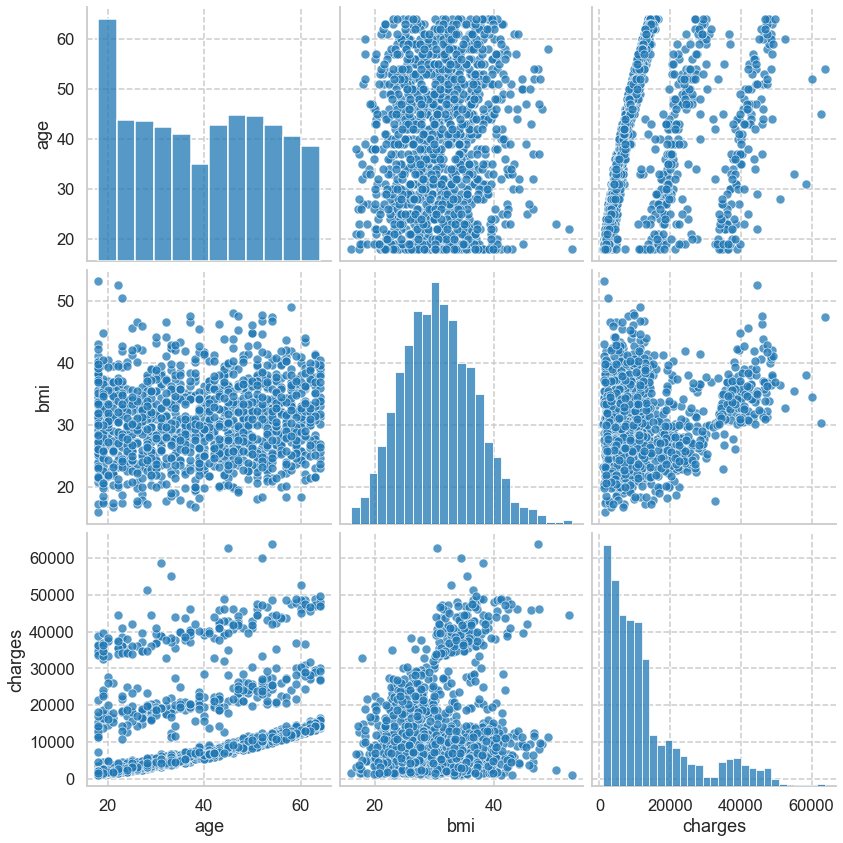

In [66]:
sns.pairplot(data[['age','bmi','charges']],size=4,plot_kws={'edgecolor':'w','alpha':0.75})
plt.show()

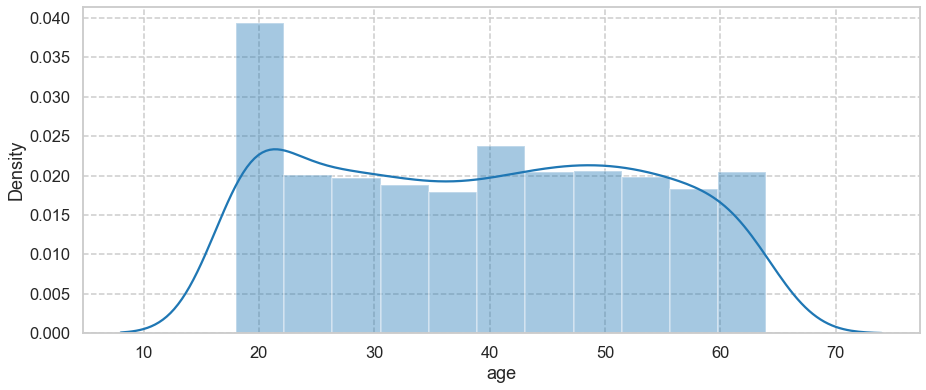

In [71]:
plt.figure(figsize=(15,6))
sns.distplot(data['age'])
plt.show()

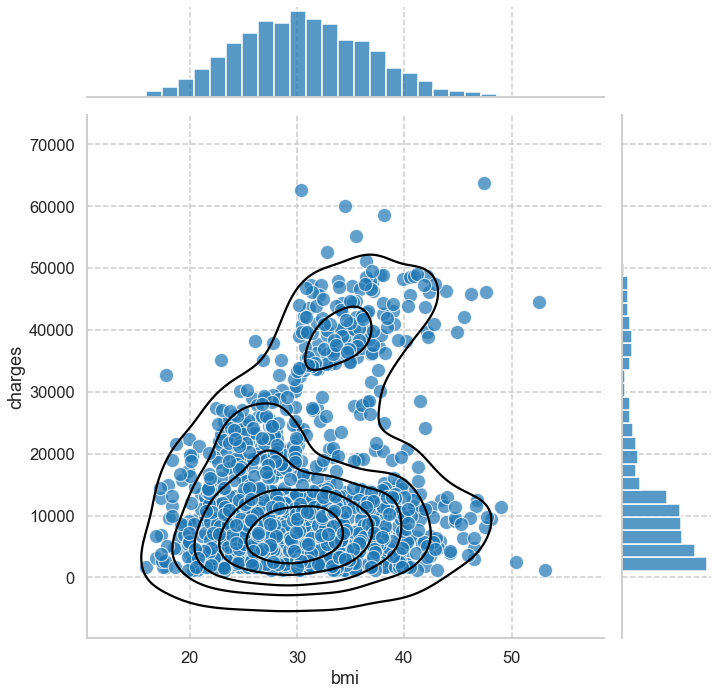

In [115]:
g = sns.jointplot(data=data,x='bmi',y='charges',height=10,s=200,alpha=0.7)
g.plot_joint(sns.kdeplot, color="k", levels=6)
plt.show()

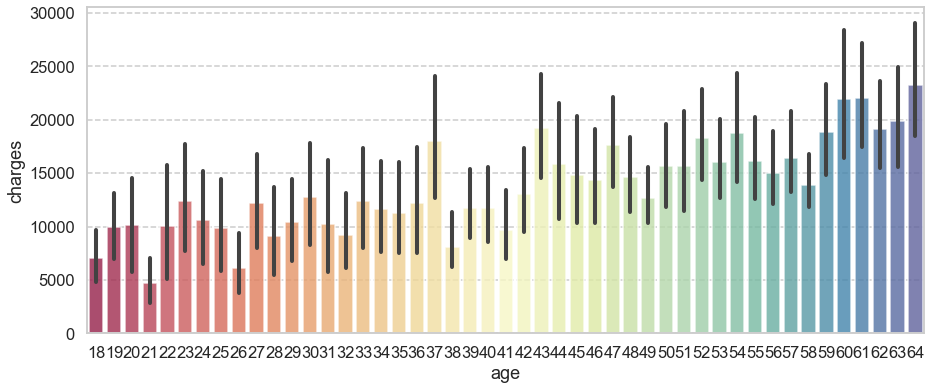

In [161]:
plt.figure(figsize=(15,6))
sns.barplot(data=data,x='age',y='charges',palette='Spectral',alpha=0.8,)
plt.show()

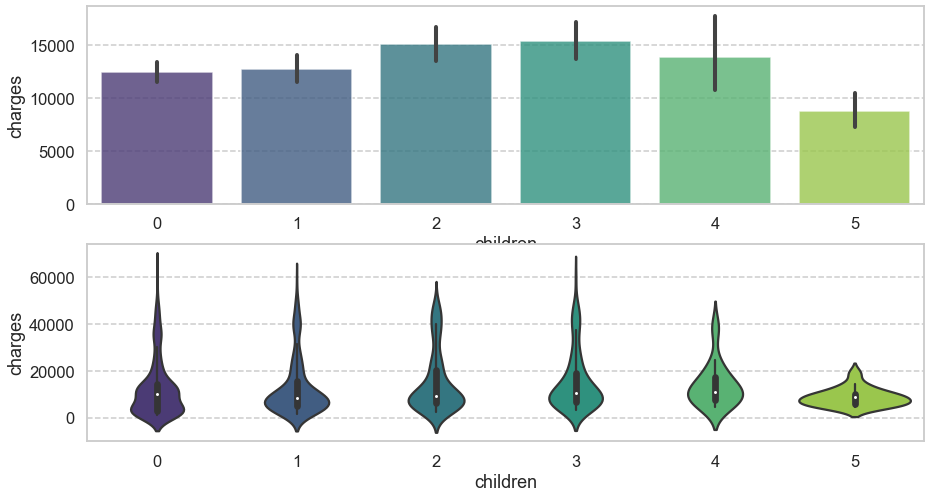

In [148]:
plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
sns.barplot(data=data,x='children',y='charges',palette='viridis',alpha=0.8)

plt.subplot(2,1,2)
sns.violinplot(data=data,x='children',y='charges',palette='viridis',alpha=0.8)

plt.show()

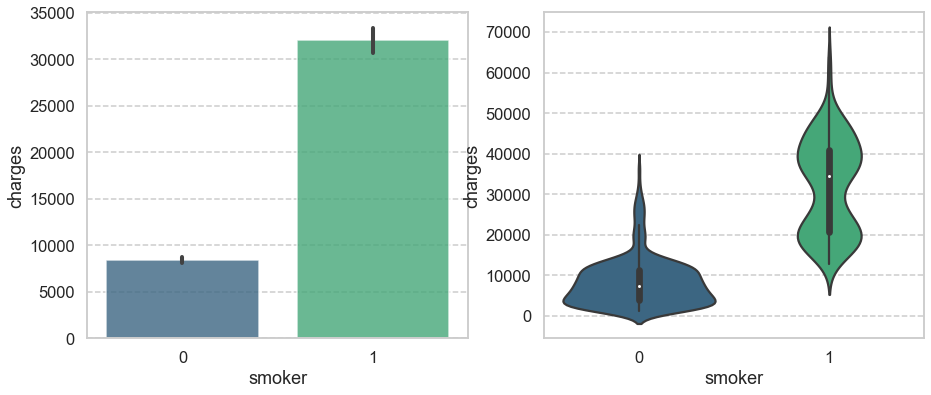

In [158]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(data=data,x='smoker',y='charges',palette='viridis',alpha=0.8)

plt.subplot(1,2,2)
sns.violinplot(data=data,x='smoker',y='charges',palette='viridis',alpha=0.8)
plt.show()

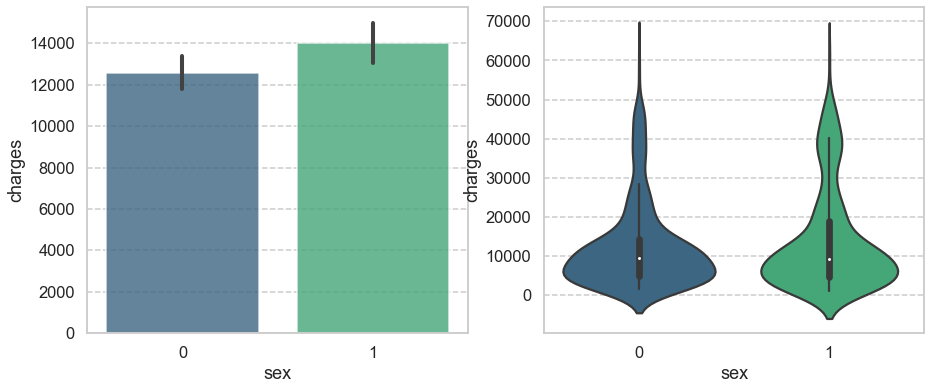

In [152]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(data=data,x='sex',y='charges',palette='viridis',alpha=0.8)

plt.subplot(1,2,2)
sns.violinplot(data=data,x='sex',y='charges',palette='viridis',alpha=0.8)
plt.show()

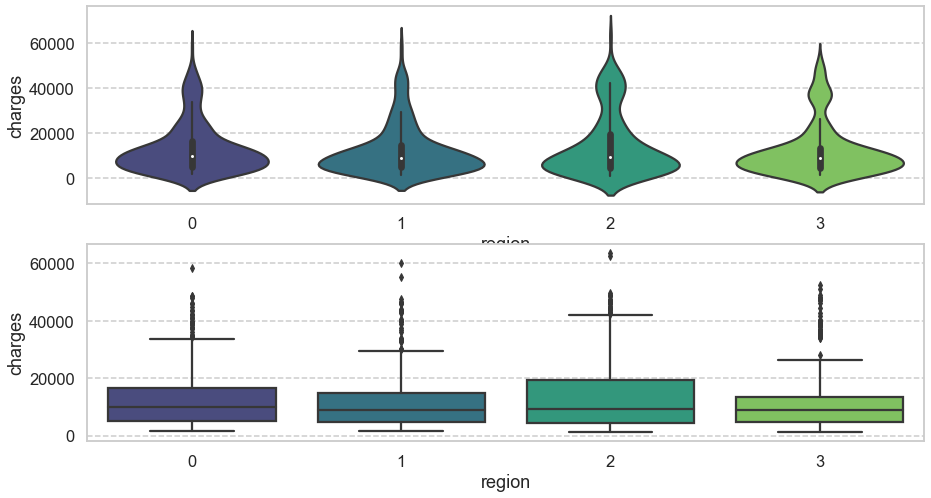

In [155]:
plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
sns.violinplot(data=data,x='region',y='charges',palette='viridis',alpha=0.8)

plt.subplot(2,1,2)
sns.boxplot(data=data,x='region',y='charges',palette='viridis')

plt.show()

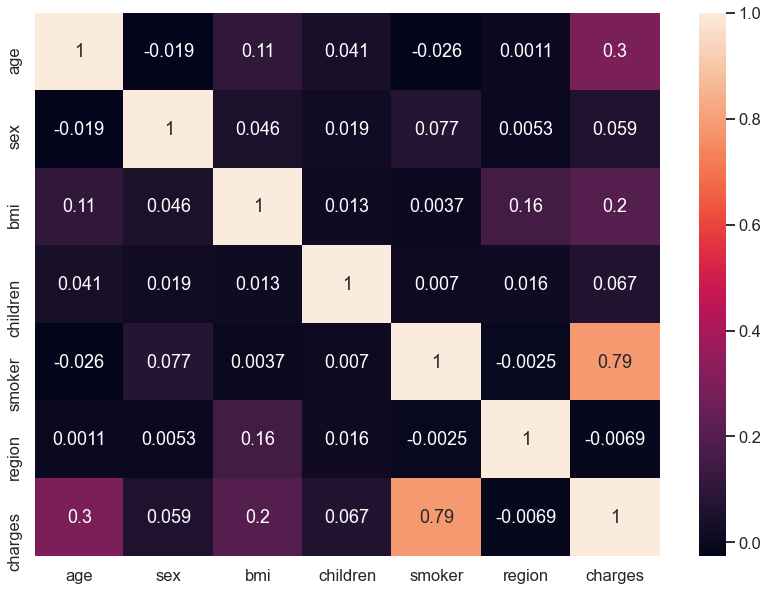

In [120]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [219]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=30)
print(x_train.shape)
print(x_test.shape)

(935, 6)
(401, 6)


In [220]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [244]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print("MSE :", mse)
rmse = np.sqrt(mse)
print("RMSE :", rmse)
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)

MSE : 34297892.89309199
RMSE : 5856.4402919428785
r2 score : 0.73615163063311


In [257]:
model = SVR(kernel='linear')
model.fit(x_train, y_train)
y_pred_2 = model.predict(x_test)
mse = mean_squared_error(y_test,y_pred_2)
print("MSE :", mse)
rmse = np.sqrt(mse)
print("RMSE :", rmse)
r2 = r2_score(y_test, y_pred_2)
print("r2 score :", r2)

MSE : 130646547.43705517
RMSE : 11430.072066135679
r2 score : -0.005043622129448977


In [246]:
model = RandomForestRegressor(n_estimators = 40, max_depth = 4, n_jobs = -1)
model.fit(x_train, y_train)
y_pred_3 = model.predict(x_test)
mse = mean_squared_error(y_test,y_pred_3)
print("MSE :", mse)
rmse = np.sqrt(mse)
print("RMSE :", rmse)
r2 = r2_score(y_test, y_pred_3)
print("r2 score :", r2)

MSE : 21584594.45231444
RMSE : 4645.922346780501
r2 score : 0.8339530633138155


In [247]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_pred_4 = model.predict(x_test)
mse = mean_squared_error(y_test,y_pred_4)
print("MSE :", mse)
rmse = np.sqrt(mse)
print("RMSE :", rmse)
r2 = r2_score(y_test, y_pred_4)
print("r2 score :", r2)

MSE : 44966909.523086205
RMSE : 6705.737060389873
r2 score : 0.6540765407916818


In [248]:
print(y_test.shape)
print(y_pred.shape)

(401,)
(401,)


In [249]:
pred = pd.DataFrame()
pred['test'] = y_test
pred['pred'] = y_pred
pred['pred2'] = y_pred_2
pred['pred3'] = y_pred_3
pred['pred4'] = y_pred_4

In [250]:
pred.head()

,test,pred,pred2,pred3,pred4
654,12244.53100,14959.606624,9739.009980,13839.665812,11856.41150
1205,5116.50040,3267.823974,8866.221473,6694.681950,4766.02200
995,7986.47525,7629.774668,9198.914715,7955.922963,7133.90250
128,32734.18630,28426.459323,10074.109725,16674.058053,17361.76610
328,47928.03000,41278.336159,11094.793796,45491.384114,47896.79135


In [251]:
print(pred.min(axis=0))
print(pred.max(axis=0))

test     1136.399400
pred    -1076.260843
pred2    8162.904788
pred3    2631.188376
pred4    1261.442000
dtype: float64
test     49577.662400
pred     43321.424965
pred2    11279.228344
pred3    46212.558516
pred4    62592.873090
dtype: float64


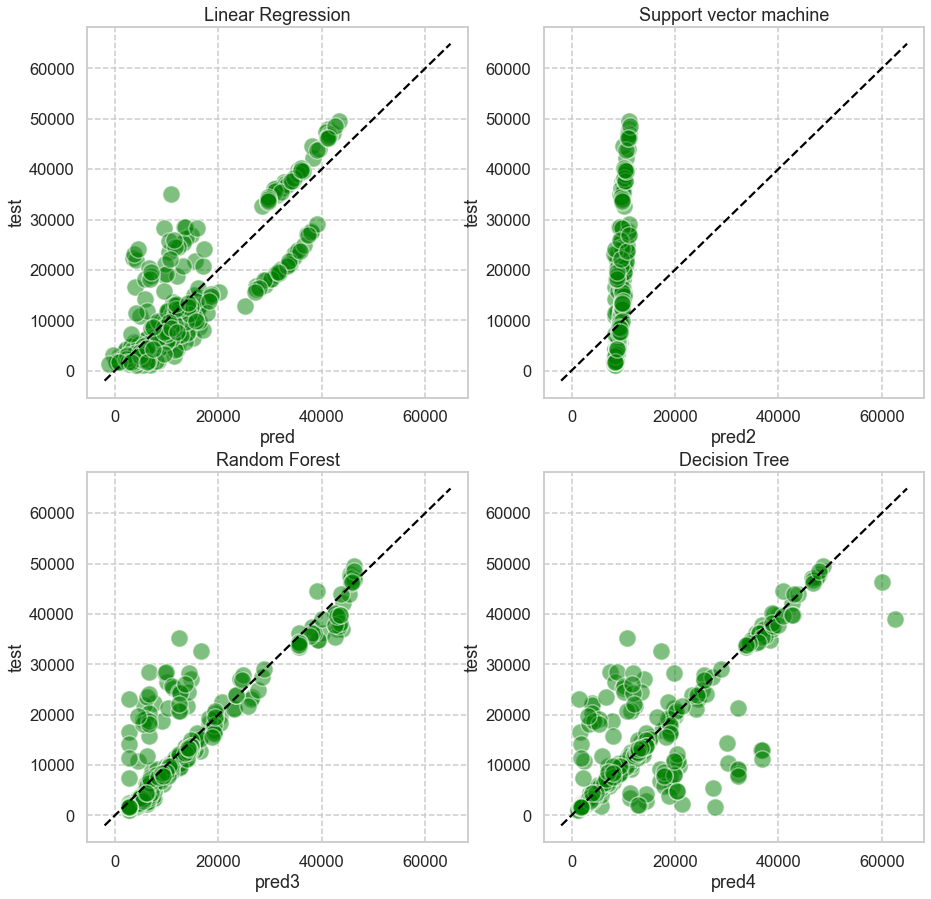

In [259]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.scatterplot(data=pred,x='pred',y='test',s=300,alpha=0.5,color='green')
sns.lineplot(x=np.arange(-2000,65000,100),y=np.arange(-2000,65000,100),color='k',linestyle='--')
plt.title('Linear Regression')

plt.subplot(2,2,2)
sns.scatterplot(data=pred,x='pred2',y='test',s=300,alpha=0.5,color='green')
sns.lineplot(x=np.arange(-2000,65000,100),y=np.arange(-2000,65000,100),color='k',linestyle='--')
plt.title('Support vector machine')

plt.subplot(2,2,3)
sns.scatterplot(data=pred,x='pred3',y='test',s=300,alpha=0.5,color='green')
sns.lineplot(x=np.arange(-2000,65000,100),y=np.arange(-2000,65000,100),color='k',linestyle='--')
plt.title('Random Forest')

plt.subplot(2,2,4)
sns.scatterplot(data=pred,x='pred4',y='test',s=300,alpha=0.5,color='green')
sns.lineplot(x=np.arange(-2000,65000,100),y=np.arange(-2000,65000,100),color='k',linestyle='--')
plt.title('Decision Tree')

plt.show()